## Recap


So far, we've described the general problem of supervised learning, where we have data $x$ and label $y$ and we want to model f(x) -> y.

If y is a continuous variable, this is known as regression, and if y is discrete, then the problem is known as classification.

In addition, we've seen that the general structure of these problems is to define the form of the model with some parameters, and then to estimate the best values of those parameters given a loss function.

So if we have formulated a supervised learning problem, and we have the data in a *tidy* format (1 observation per row, 1 variable per column), we can begin to fit the model.

For example, let's say that we have the following ridge regression example:

$$ \hat{\beta} = \underset{\beta}{\arg\min} \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^{p}\beta_j^2$$

Our goal here is to estimate the *parameters* of the model, which are the $\beta$ values. We have seen that we can fit these types of models using gradient descent, although there are other algorithms which exist to solve these types of problems. 

However, there are a few different approaches even once you have all of this information. Namely:
  * How do you estimate your test error? 
  * How do you structure your training and testing splits? 
  * How do you pick a value for $\lambda$?

### Hyperparameters

A **hyperparameter** is a parameter that is set before any model-fitting actually occurs. In the ridge regression and LASSO setting, $\lambda$ or the regularization parameters, would be a hyperparameter.

This means, *prior* to using gradient descent or some other method for estimating the $\beta$ coefficients, we must first choose a value of $\lambda$. In practice, hyperparameters do not even have to be explicit parameters in the model. For example, we can think of a hyperparameter as being whether or not we choose to standardize the covariates before starting the fitting procedure. 


### 2 Simultaneous problems

1. Estimate $\beta$ coefficients.
2. Select a good value of $\lambda$.

## Train/Test Splits

The most common approach in machine learning to estimating how well your model works is to use the Training and Test set procedure.

Often, this is done the following way:

  1. Randomly select a percentage (usually ~80%) of your dataset, and use those values of training
  2. Evaluate the model on the remaining ~20% of the data to test model performance (accuracy, MSE, etc.)


#### Pros:
 * easy to implement

#### Cons:
 * the specific examples that are in the training set and testing set may be biased in some way
 * only use some of the data to fit the model - depending on the size of your data, can overestimate error
 
#### Practical Considerations:
 * What percentage of data to choose?
 * How to assess differences in training vs. test?

## Cross-Validation

Cross-Validation is a technique that addresses some of the downsides of training/test splits. 

Instead of splitting the data once, cross-validation splits the data many times and averages the error over the splits.

## k-Fold

The most common form of cross-validation is known as *k-fold* validation. In *k-fold* cross-validation, the data is split into $k$ evenly-sized groups, where $k$ is usually 5 or 10. The general idea is to fit the model on k-1 groups, and then test on the last group. Then, you cycle the groups and average the error over the groups (folds).

The Cross-Validated error is estimated by:

$$ CV_{(k)} = \frac{1}{k}\sum_{i=1}^{k}MSE_i $$

![](./assets/kfold.png)

## LOOCV

In the extreme case, where the number of folds is equal to the number of data points, this process is known as *leave-one-out* cross-validation. The scheme then looks like this:

![](./assets/loocv.png)

#### Pros:
 * Use almost all the data to train the model
 * Repeated iterations will always result in the same answer
 
#### Cons:
 * Computationally very expensive

Also a bias-variance tradeoff! Although LOOCV has lower bias, it has a much higher variance. This is due to the fact that each of the models are much more correlated with one another (they only differ by 1 data point), and variances of samples of highly correlated variables are generally higher than those that are less correlated.

[Explanation](https://stats.stackexchange.com/a/223461)

# What about hyperparameters?

If we used a training/test split, and we wanted to vary $\lambda$ in a LASSO setting, One procedure could be testing different values of $\lambda$ fit on the training set and evaluated on the test set.

## Overfitting

The problem with this method is that you may overfit to your test set. The more times you evaluate a model on the same test set, the higher the chance that you obtain a good result by chance. This is analogous to the multiple comparison problem in hypothesis testing.

Case study: [Kaggle](http://gregpark.io/blog/Kaggle-Psychopathy-Postmortem/)

## Validation Set

In this case, is there is enough data, one strategy would be to use a validation set in addition to a testing set.

In this procedure, we have 3 splits: a training split, validation split, and test split. 

The general procedure is as follows:

 1. Use the training split and evaluate different values of hyperparameters on the validation split. 
 2. Whatever the best values of the hyperparameters are, select those and train on the combined training and validation split. 
 3. Evaluate the performance **once** on the test set
 
In practice, steps 1 and 2 are usually done in a cross-validation setting. This is another purpose of cross-validation

## Healthcare considerations

In healthcare, there are other considerations that may play a part in how to decide on splitting the data

#### Generalization over time

Oftentimes, if we train data on a particular time period, we want to evaluate how well it works in a different time setting. Research has shown that models trained on one time period often deteriorate over time, either due to shifting populations or other dynamic factors.

In this setting, it may be useful to consider training and test splits that occur over time. For example, train on 12 months of data and assess performance on subsequent 12 months.

#### Generalization by site

Models trained on one population often do not generalize to other populations. It is critical to validate a model on other patient populations, which is a standard in clinical care. In these settings, it may make sense to have a training set of one patient population and then test on another population.

This is also an area of active research

## Deployment considerations

Deploying models into production has a whole host of issues associated with it. The most important consideration is that the data that you are serving the model on is similar to the data that you trained on.

In addition, data that is available at serve time should determine the features that you use in your model. If data will only be available after the model needs to be run, it does not make sense to include in the model.

We will cover common problems with model deployment in a future lecture

## SKlearn, LASSO, and Cross-Validation

## In-class Exercise

The following code builds a design/model matrix with the diabetes data

In [1]:
import pandas as pd
diabetes_df = pd.read_csv('./data/diabetes_df.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
model_subset = diabetes_df.loc[:, ['encounter_id', 'race', 'gender', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]

In [3]:
id_subset = diabetes_df.loc[:, ['encounter_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']]

In [4]:
ccs_subset = diabetes_df.loc[:, ['encounter_id', 'CCS Category Description 1', 'CCS Category Description 2', 'CCS Category Description 3']]

In [5]:
model_subset = pd.get_dummies(model_subset, prefix = "ind_", dummy_na = True, drop_first = True)

In [6]:
id_subset = pd.get_dummies(id_subset, columns = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id'],prefix = {x:x for x in id_subset.columns if x is not 'encounter_id'}, dummy_na = True, drop_first = True)

In [7]:
ccs_subset = pd.get_dummies(ccs_subset, prefix = "ind_", dummy_na = True, drop_first = True)

#### Combine repeated columns

In [8]:
import numpy as np

In [9]:
ccs_subset = ccs_subset.groupby(ccs_subset.columns, axis = 1).sum()

#### Join all dataframes together

In [10]:
outcome = diabetes_df.loc[:, 'time_in_hospital']

In [11]:
model_dataset = (model_subset.merge(id_subset, how = "left", on = "encounter_id")
                             .merge(ccs_subset, how = "left", on = "encounter_id")
                )

In [12]:
model_matrix = model_dataset.drop('encounter_id', axis = 1).values

In [13]:
model_matrix

array([[41,  0,  1, ...,  0,  0,  2],
       [59,  0, 18, ...,  0,  0,  0],
       [11,  5, 13, ...,  0,  0,  2],
       ...,
       [53,  0,  9, ...,  0,  0,  2],
       [45,  2, 21, ...,  0,  0,  1],
       [13,  3,  3, ...,  0,  0,  0]])

In [14]:
model_matrix.shape

(101766, 264)

In [15]:
outcome.shape

(101766,)

## Fit a LASSO using cross-validation

In [18]:
from sklearn import linear_model, model_selection

The goal here will be to fit a LASSO Linear Regression. Specifically, we want to find the right value of $\lambda$ that minimizes the test MSE.

$$ \hat{\beta} = \underset{\beta}{\arg\min} \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^{p}|\beta_j|$$

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2 $$

### Split the data into a training and test split

Make sure to randomly select rows. You can use scikit-learn's helper functions or write your own. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(model_matrix, outcome.values, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(81412, 264)

In [24]:
X_test.shape

(20354, 264)

In [52]:
y_train.shape

(81412,)

In [53]:
y_test.shape

(20354,)

### Use the Cross-validated LASSO in Sci-kit learn to fit the model to the data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [54]:
model = linear_model.LassoCV(cv = 5) # This line simply instantiates the object. Here, we set k, the number of folds, to 5

In [55]:
model.fit(X_train, y_train) # Fit the training data

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

The model object now contains attributes that can be seen in the "Attributes" section of the documentation above.

To extract the best value of $\lambda$, we can call

In [32]:
model.alpha_

0.018779364347744607

Notice that in scikit-learn, the regularization parameter is called $\alpha$

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

`model.mse_path_` contains a matrix that is (n_alpha, n_folds) which shows the mean square error for each fold of crossvalidation for each lambda value. The lambda values can be accessed via `model.alphas_`

Here, we used the default $\lambda$ values that are run by the function. However, it may be worth specifying our own. 

In [63]:
Average_MSE = np.mean(model.mse_path_, axis = 1)

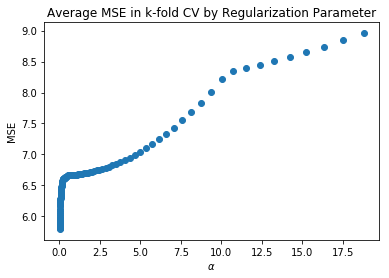

In [72]:
fig, axes = plt.subplots()
axes.scatter(model.alphas_, Average_MSE)
axes.set(title = "Average MSE in k-fold CV by Regularization Parameter", xlabel = r'$\alpha$', ylabel = "MSE")
axes

It turns out that MSE seems like it grows monotonically with $\alpha$. This means that perhaps we should try supplying our own values of $\alpha$ take broader ranges. 

In [74]:
print(np.min(model.alphas_), np.max(model.alphas_))

0.018779364347744607 18.779364347744607


In [80]:
model.alphas_.shape

(100,)

#### Refit

In [86]:
alphas = np.logspace(-5, 5, 100)

In [87]:
alphas

array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.32194115e-03, 1.66810054e-03, 2.10490414e-03,
       2.65608778e-03, 3.35160265e-03, 4.22924287e-03, 5.33669923e-03,
       6.73415066e-03, 8.49753436e-03, 1.07226722e-02, 1.35304777e-02,
       1.70735265e-02, 2.15443469e-02, 2.71858824e-02, 3.43046929e-02,
       4.32876128e-02, 5.46227722e-02, 6.89261210e-02, 8.69749003e-02,
       1.09749877e-01, 1.38488637e-01, 1.74752840e-01, 2.20513074e-01,
       2.78255940e-01, 3.51119173e-01, 4.43062146e-01, 5.59081018e-01,
       7.05480231e-01, 8.90215085e-01, 1.12332403e+00, 1.41747416e+00,
       1.78864953e+00, 2.25701972e+00, 2.84803587e+00, 3.59381366e+00,
      

In [88]:
new_model = linear_model.LassoCV(cv = 5, alphas = alphas)

In [89]:
new_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000e-05, 1.26186e-05, ..., 7.92483e+04, 1.00000e+05]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [90]:
new_model.alpha_

5.0941380148163754e-05

In [91]:
new_average_MSE = np.mean(new_model.mse_path_, axis = 1)

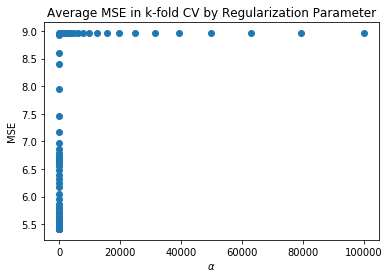

In [92]:
fig, axes = plt.subplots()
axes.scatter(new_model.alphas_, new_average_MSE)
axes.set(title = "Average MSE in k-fold CV by Regularization Parameter", xlabel = r'$\alpha$', ylabel = "MSE")
axes

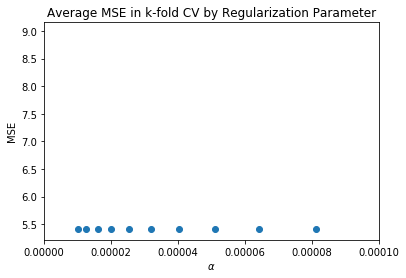

In [95]:
fig, axes = plt.subplots()
axes.scatter(new_model.alphas_, new_average_MSE)
axes.set(title = "Average MSE in k-fold CV by Regularization Parameter", xlabel = r'$\alpha$', ylabel = "MSE", xlim = (0, 0.0001))
axes

## Extract the best value for $\lambda$

Use this value to fit the final model on the combined training set and evaluate the performance on the test set

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [96]:
final_model = linear_model.Lasso(alpha = new_model.alpha_).fit(X_train, y_train)

### How many non-zero coefficients are in the final model?

In [97]:
final_model.coef_

array([ 0.02667512,  0.21332089,  0.12829873, -0.06624804, -0.05867516,
        0.03358425,  0.0497016 , -0.08323201, -0.2946486 , -0.05428888,
       -0.2222244 , -0.37065192, -0.04204017, -0.        ,  0.43171306,
       -0.15949923, -0.        ,  0.08991762, -0.0437033 , -0.        ,
       -1.00701513,  0.        ,  0.01457063,  1.26113169,  1.10021313,
        1.30262448,  0.79213418, -0.71122419,  1.75015143,  0.59695693,
        0.        , -0.36122207, -0.        ,  1.31781822,  0.92385744,
        1.78885463,  0.12052934,  2.9599074 ,  1.17043998, -1.30979735,
        0.        ,  1.07410531,  1.552948  , -0.        ,  0.80459617,
        5.35559214, -0.        ,  0.        , -0.09134356, -0.        ,
        0.60444241,  0.27236628,  0.5295504 ,  0.15560536,  0.89580379,
       -0.02929505, -0.        ,  0.        ,  0.        , -0.        ,
        0.05045903, -0.39049273,  1.27476625,  0.        ,  0.        ,
       -0.53686821, -0.        ,  0.38859369, -0.65328021,  0.88

In [100]:
np.sum(final_model.coef_ != 0)

221

Recall that the LASSO penalty will shrink some coefficients to exactly 0.

## Standardization

Recall that for regularization, it is recommended that you "standardize" the inputs beforehand. Let's see why this is.

In [103]:
model_matrix

array([[41,  0,  1, ...,  0,  0,  2],
       [59,  0, 18, ...,  0,  0,  0],
       [11,  5, 13, ...,  0,  0,  2],
       ...,
       [53,  0,  9, ...,  0,  0,  2],
       [45,  2, 21, ...,  0,  0,  1],
       [13,  3,  3, ...,  0,  0,  0]])

Notice that there is an order of magnitude difference in some cases between the values in some columns versus others.

A subtle note that is important is that when we standardize a column, which looks like:

$$ Z = \frac{x - \bar{x}}{\sigma} $$

we need to do that *separately* for each cross-validated fold

It is very easy to just standardize everything at the beginning, but in a sense this is *cheating* since you are using data that should belong in a test fold. Unfortunately, sci-kit learn does not have an easy way to do this (that I know of).

#### Define our own cross-validation scheme

In [107]:
mse_path_ = [] # keep track of the MSE paths for each lambda
k = 5
alphas = np.logspace(-5, 5, 100)


In [114]:
# Since the train_test_split function automatically randomizes the rows, 
# we can simply cut the rows into 5 parts to keep track of folds

fold_indices = np.array_split(np.arange(0, X_train.shape[0]), k)


In [116]:
fold_indices #fold_indices[0] refers to the first fold, etc.

[array([    0,     1,     2, ..., 16280, 16281, 16282]),
 array([16283, 16284, 16285, ..., 32563, 32564, 32565]),
 array([32566, 32567, 32568, ..., 48845, 48846, 48847]),
 array([48848, 48849, 48850, ..., 65127, 65128, 65129]),
 array([65130, 65131, 65132, ..., 81409, 81410, 81411])]

In [117]:
def squared_error(prediction, true_value):
    return (true_value - prediction)**2

In [143]:
from sklearn import preprocessing # the function scale will standardize a matrix: https://scikit-learn.org/stable/modules/preprocessing.html

In [144]:
# Begin Cross-validation

for alpha in alphas:
    mse_list = [] # We will append MSEs to this list
    for iteration in range(0, k):
        test_fold_indices = fold_indices[iteration]
        
        model = linear_model.Lasso(alpha = alpha)
        # Standardize the train set
        
        model.fit(preprocessing.scale(np.delete(X_train, test_fold_indices, axis = 0)), np.delete(y_train, test_fold_indices))
        # np.delete https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.delete.html
        
        # Now that the model has been fit on the 4 folds, we can test it on the final fold
        predictions = model.predict(preprocessing.scale(X_train[test_fold_indices, :]))
        
        MSE = np.mean(squared_error(predictions, y_train[test_fold_indices]))
        mse_list.append(MSE)
    
    # mse_list should now have k values. We can add those to mse_path_
    mse_path_.append(mse_list)
    

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [158]:
average_MSE = [np.mean(x) for x in mse_path_]

In [159]:
average_MSE

[5.41348710826948,
 5.4134842149302544,
 5.413480630674746,
 5.413475799829682,
 5.413470282504021,
 5.413463584990884,
 5.413455551709465,
 5.413443532334902,
 5.413431474959747,
 5.413420977221386,
 5.413406955888247,
 5.413389554066868,
 5.413371052232728,
 5.41334904931109,
 5.413347782756016,
 5.413380245035859,
 5.413426757086298,
 5.413485207019086,
 5.413638760496745,
 5.413798183038567,
 5.414092703538495,
 5.414353654257972,
 5.414632425115923,
 5.414591276618047,
 5.414708010422109,
 5.4150595313909,
 5.415744584043457,
 5.416703296551081,
 5.418476322338404,
 5.421643307775618,
 5.426893979025889,
 5.434853197023292,
 5.446343832846515,
 5.462999777922703,
 5.486012428093706,
 5.517020857048786,
 5.559916799222795,
 5.615345336962137,
 5.684399658800582,
 5.770169200154751,
 5.878993929945499,
 5.9884674916197715,
 6.112892897370995,
 6.260027616135514,
 6.405567469461244,
 6.616034090674238,
 6.90673630747653,
 7.149772414365844,
 7.441552113523679,
 7.807443599554285,
 8.

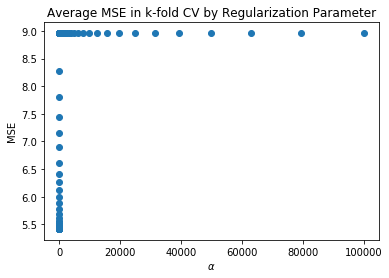

In [160]:
fig, axes = plt.subplots()
axes.scatter(alphas, average_MSE)
axes.set(title = "Average MSE in k-fold CV by Regularization Parameter", xlabel = r'$\alpha$', ylabel = "MSE")
axes

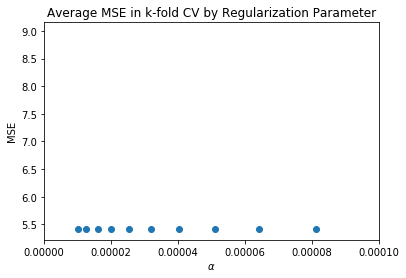

In [162]:
fig, axes = plt.subplots()
axes.scatter(alphas, average_MSE)
axes.set(title = "Average MSE in k-fold CV by Regularization Parameter", xlabel = r'$\alpha$', ylabel = "MSE", xlim = (0, 0.0001))
axes

### find minimum MSE

In [163]:
np.where(average_MSE == np.min(average_MSE))

(array([14]),)

In [164]:
alphas[14]

0.00025950242113997375

In [165]:
### Fit new model using this alpha

In [166]:
final_scaled_model = linear_model.Lasso(alpha = alphas[14])

In [167]:
final_scaled_model.fit(preprocessing.scale(X_train), y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Lasso(alpha=0.00025950242113997375, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
final_scaled_model.coef_

array([ 5.25957729e-01,  3.63654803e-01,  1.04125015e+00, -8.32223550e-02,
       -5.42033019e-02,  4.19511929e-02,  9.51659271e-02, -6.96107911e-03,
       -1.27672335e-01, -7.57900335e-03, -2.70127946e-02, -5.46167198e-02,
       -2.11484827e-02, -0.00000000e+00,  1.66363797e-01, -6.15155369e-02,
       -1.31084521e-03,  1.86594532e-02, -9.67515963e-03, -9.33806374e-04,
       -5.64370462e-02,  0.00000000e+00,  2.17069446e-03,  4.32121876e-01,
        9.83781899e-02,  1.40644085e-01,  2.62814824e-01, -5.54199762e-02,
        5.95522690e-02,  1.22690427e-02,  5.87480678e-03, -4.59161750e-02,
       -5.59646654e-03,  8.14698609e-02,  5.60630222e-02,  4.47845388e-02,
        5.61969490e-03,  3.84864854e-02,  2.19337754e-01, -1.69083556e-02,
        5.16345693e-03,  1.48656305e-01,  1.00488391e-01, -1.78288897e-03,
        7.95541904e-02,  3.66378496e-02, -0.00000000e+00,  0.00000000e+00,
       -9.86525862e-03, -0.00000000e+00,  1.05759509e-01,  2.46439231e-02,
        7.83284741e-02,  

In [170]:
np.sum(final_scaled_model.coef_ != 0)

255

In [171]:
np.sum(final_scaled_model.coef_ == 0)

9

# Test the two models

In [180]:
initial_model_predictions = final_model.predict(X_test)

In [182]:
np.mean(squared_error(initial_model_predictions, y_test))

5.264171113055042

In [187]:
final_model_predictions = final_scaled_model.predict(preprocessing.scale(X_test))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [188]:
np.mean(squared_error(final_model_predictions, y_test))

5.261284625159031

In [189]:
preprocessing.scale(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.2785174 , -0.78747569,  0.48088927, ..., -0.44882425,
        -0.00991314,  0.15917801],
       [-1.19272879, -0.78747569, -1.11221297, ..., -0.44882425,
        -0.00991314,  0.15917801],
       [-1.14124449,  0.96738146,  0.84852825, ..., -0.44882425,
        -0.00991314,  2.70028329],
       ...,
       [-0.11155858,  0.38242907,  0.11325029, ..., -0.44882425,
        -0.00991314, -1.11137463],
       [-1.0897602 , -0.78747569, -1.35730563, ..., -0.44882425,
        -0.00991314,  0.15917801],
       [-1.39866597,  1.55233384, -0.25438869, ...,  2.06849977,
        -0.00991314, -1.11137463]])

The results are not that dramatic, but the second method is recommended nonetheless. 